# Non-Linear/Polynomial Regression.
# Learning how to make a single Prediction
# Scenario: HR-Department
Let imaging we are an HR-Department and we want to hire someone and we found someone that is a <br>
great fit for the job and we will like to offer this person a position in our company, this person<br>
said yes, since that person is advance in his carer, he is asking **160k$ per year** and the HR asks him <br>
why a pretty high salary and he respond that is what he earn at his previous company and he is expecting the <br>
same or more in their company. Is that a **truth** or **a bluff**, that is exactly what we're going to figure out in the<br>
polynomial regression model.<br>

**We're going to build a Polynomial regression model to predict the previous salary of this candidate** <br>
- The Data we're going to use is the data of the previous company from Business Analyst to CEO
- Consider we visited linkedin profile of the candidate and saw that he was a Region Manager and it turns out that<br>
  He has been a region manager for 2 years, therefor the salary of the person should not be exactly 150k$ and we can<br>
  see on the data set, instead it should be some where between 150k$ - 200k$, therefor we can say the person has a<br>
  position between 6 - 7, let's consider his position to be 6.5, so that we can deploy our model after training it on<br>
  on the position level 6.5, so that we can get the predicted salary of such a position level.
- And we will compare the predicted salary to the salary expected by the person to see if the is **true** or **bluff**

# 0. Importing the Libraries

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1. Importing the Data Set

In [73]:
# 1. Importing our Data set
data_set = pd.read_csv('Position_Salaries.csv')

# 2. Localize the independent Variable/Features
# Column 1 and 2 in the data set are redundance, therefor we need to deal with one i.e preferable  2
X = data_set.iloc[:, 1:-1].values     # all the column from 1st except the last want.

# 3. Localizing our dependent variable
Y = data_set.iloc[:, -1].values

# 2. Taking Care of the Missing Data
We don't have NaN, therefore skip

# 3. Encoding Categorical Data
Since our **categorical Variable** is the same as **level** we don't have to worry about encoding Categorical<br>
Variables.

# 4. Splitting the Data Set
We are going to skip this step because we want to leverage the Maximum data, in order to make<br>
our feature prediction of the salary for the position number 

# 5. Feature Scaling
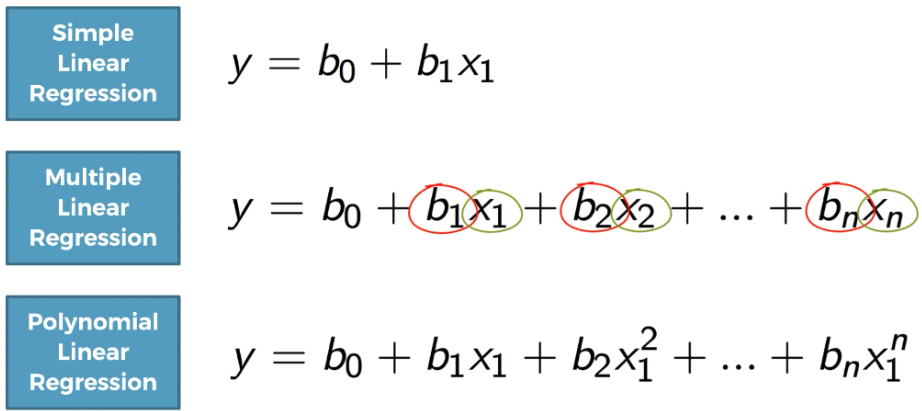 <BR>
In Multiple Linear Regression we don't have to apply feature Scaling. this is because the in the equation of the linear regression the coefficient $b_n$ <br>
is multiply to each feature/individual variable and therefor doesn't matter if some feature have higher value than others because the coefficient $b_n$ will<br>
compensate to put every thing on the same scale therefor <br>

**No need to apply feature Scaling**<br>

# 6. Training the Linear Regression on the Whole Data Set
Using Liner Regression simply because we want to compare Linear Regression and Polynomial Regression<br>
i.e **We want to show that a Polynomial Regression will be much more adapted to this data set**.
- After Training the Linear Regression model on the Data set we will Train the Polynomial Model <br>
  on the whole data set as well.

In [74]:
# 1. import the linear regression class from Linear model
from sklearn.linear_model import LinearRegression
# 2. Building our untrained model and storing it in a variable
lin_reg = LinearRegression()  # Without Parameter

# 3. Using the fit() method to train our model
    # Since we did not split the data set in order to leverage/have the  ...
    #... maximum data in order to train our model therefor we're going....
    #... to take the whole features X and dependable variable Y
lin_reg.fit(X, Y)         # fit() takes the matrix of feature X and dependent variable Y of the training set as parameter.

LinearRegression()

# Training the Polynomial Regression on the whole Data Set
**Focus**: How to build the Polynomial regression model.

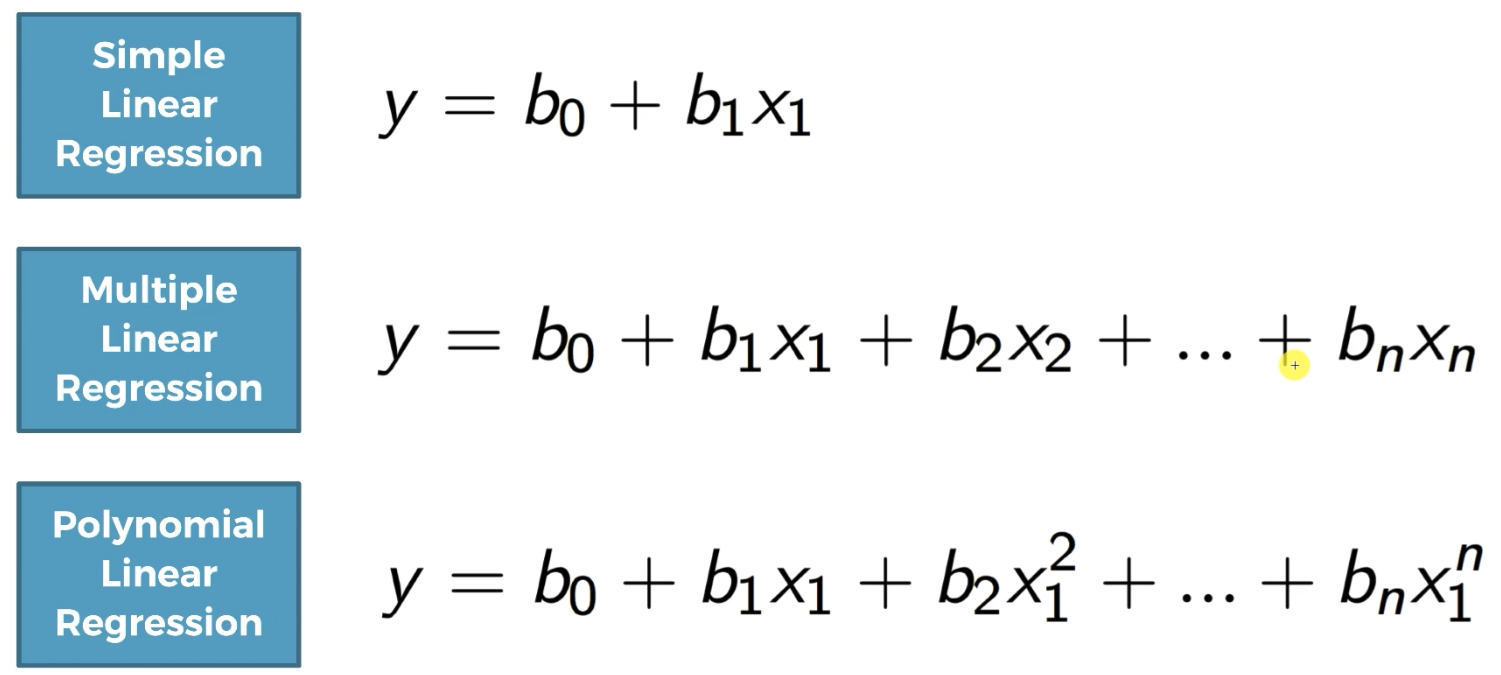 <br>
- What we build sofar was a Linear Regression Model
- Now we're going to create a multiple linear regression Model, but instead of having different<br>
  feature $x_1,\space x_2,\space x_n$ well these features will be  $x_1,\space x_2^2,\space x_n^n$ <br>
  and we will tune this parameter to try several powers

In [75]:
# 1. Importing the class that will allow us to create the power features.
from sklearn.preprocessing import PolynomialFeatures

# 2. Creating an object of the class to store our variable
# poly_reg = PolynomialFeatures(degree = 2 )            # we want to build a polynomial equation of degree 2.

# With higher degree we can obtain a much more better result.
poly_reg = PolynomialFeatures(degree = 5 )

# 3. Transforming b1x1 into b2x1^2 and storing b0, b1x1 and b2x1^2  in X_poly using the fit_transform() method
X_poly = poly_reg.fit_transform(X)                    # fit_transform will transform the level feature i.e. X1 into a new matrix ....
                                                      #... of features compose of x1 as the first feature and x1^2 as the ...
                                                      # ... the 2nd feature.

# 3. Creating/building our polynomial regression
lin_reg_2 = LinearRegression()
# 3. Training our Polynomial equation using the features b0, b1x1 and b2x1^2 stored in X_poly
lin_reg_2.fit(X_poly, Y)


LinearRegression()

# 6.1 Visualizing the the Linear Regression result
Then we will visualize the Linear Regression result on the whole Data set, then the polynomial.

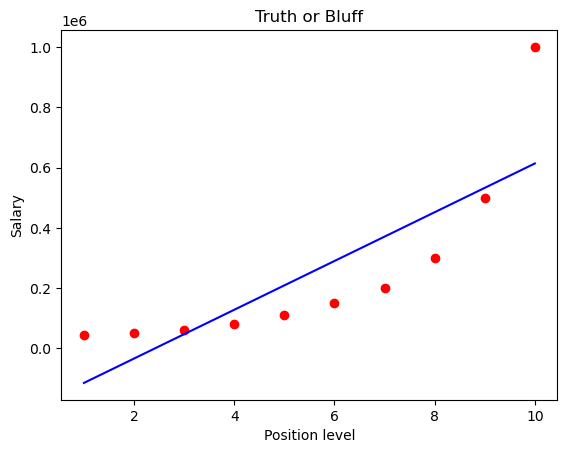

In [76]:
# 1. Calling the scatter function from plt module, in order to display the different point/coordinate....
#... containing the result. i.e. 
# plotting salary against Position level
plt.scatter(X, Y, color = 'red') 

# 3. Plotting the Linear regression line 
plt.plot(X, lin_reg.predict(X), color = 'blue')  # As Parameter:   X for Position level against the Predicted salary 
                                                 # Predicted Salary (Y_pred) = prediction of the linear regression of the Position level.
                                                 #                           = lin_reg.predict(X)
plt.title('Truth or Bluff')
plt.xlabel('Position level')
plt.ylabel('Salary')

# 4. Show the Graph by using the show function
plt.show()

Note:<br>
        - we can see that the linear regression model is not well adapted to our data set. <br>
          Since the prediction is far/(not close) to the real result. Since we may offer <br>
          a higher salary than expected in the real world.

# Visualizing the Polynomial Regression result

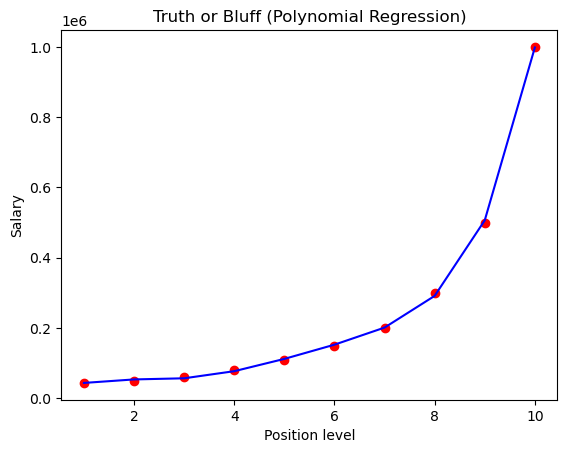

In [77]:
# 1. Calling the scatter function from plt module, in order to display the different point/coordinate....
#... containing the result. i.e. 
# plotting salary against Position level
from numpy import poly


plt.scatter(X, Y, color = 'red') 

# 2. Plotting the Polynomial regression line 
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')  # As Parameter:    b0, b1x1 and b2x1^2  in X_poly
                                                                           # we  can't keep X since X is the matrix of feature..
                                                                           # ... of single level, therefore we have to transform..
                                                                           # ... X to the different Powers i.e. b0, b1x1, b2x^2                               
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')

# 3. visualizing the Graph by using the show() function
plt.show()

Note: <br>
- We have **overfitting**, but for this situation it okay to have **overfitting**.

# Visualizing the Polynomial Regression result(for higher resolution and smoother curve)

C:\Users\user\AppData\Local\Temp\ipykernel_8232\3318102021.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


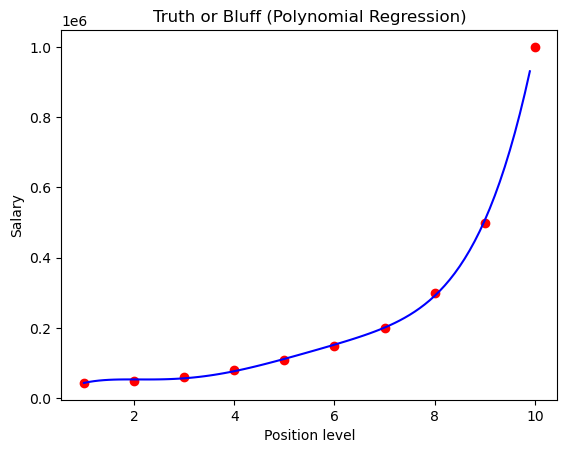

In [78]:
# For the purpose of having a much more beautiful polynomial
# 1. Calling the scatter function from plt module, in order to display the different point/coordinate....
#... containing the result. i.e. 
# plotting salary against Position level
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, Y, color = 'red' )

# 2. Plotting the Polynomial regression line 
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')

# 3. visualizing the Graph by using the show() function
plt.show()

# 7. Evaluating our Model: Predicting a New Result with Linear Regression
In the end we will predict the salary for the position level between 6 and 5. with linear and <br>
Polynomial Regression.
- We will see that we will get a much better  result with Polynomial Regression
- We will then predict a new result with Linear Regression and then Polynomial Regression.
- Here we will lear how to predict hte result of a single observation.

In [ ]:
# Should be input in an array in double bracket since we're working in 2D i.e row and column
# The Person ask for 160k$ Salary, does the salary correspond to his level.
lin_reg.predict([[6.5]])

# The linear Regression model return a salary of 330k$ per year, let see what the polynomial regression says.
# Comparing the salary obtain from the polynomial model we can conclude that the liner regression is not 
# ... accurate

array([330378.78787879])

# Evaluating our Model: Predicting a New Result with Polynomial Regression

In [80]:
# 1.  We have to change the name of our regression
# 2. Here we can't input that single position level and we should instead input the exact..
# ... feature of this polynomial regression model i.e. b0, b1x1 and b2x1^2 .... b4x^4
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([174878.07765127])

Note: <br>
- The predicted salary is 175k$ which is super close to the salary the person earned at ht previous company.
- Not only the person is a good fit for the job, he is also a very honest person